# Chapter 1.6 - Estimation

** Contributors: Devon Morris **

### Table of Contents

 1. [Introduction](#Introduction)
 1. [Multiplicative Extended Kalman Filter](#Multiplicative-Extended-Kalman-Filter)
 1. [Open-Loop Implementation](#Open-Loop-Implementation)

## Introduction

Estimation (or estimating) is the process of finding an estimate, or approximation, which is a value that is usable for some purpose even if input data may be incomplete, uncertain, or unstable [(see wikipedia)](https://en.wikipedia.org/wiki/Estimation). Specifically, we want to specify a probability (likelihood) for all possible states in our configuration space.

To do this, we could specify a distribution directly on the manifold such as the [von Mises distribution](https://en.wikipedia.org/wiki/Von_Mises_distribution) for $S^1 \cong SO(2)$, or the [von Mises-Fisher distribution](https://en.wikipedia.org/wiki/Von_Mises%E2%80%93Fisher_distribution) for $S^n$. However, these distributions are expensive to compute since they have have a bessel function term and more importantly, they lack the [Bayesian conjugacy](https://en.wikipedia.org/wiki/Conjugate_prior) that makes the [Kalman filter](https://en.wikipedia.org/wiki/Kalman_filter) computationally feasible. Also, generalized probability theory and measure theory on arbitrary Lie groups is still very much in its infancy.

Probability theory on $\mathbb{R}^n$, however, is very well understood and there are many distributions at our disposal to do estimation on this vector space. Typically, we use the [multivariate gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) due to its nice properties under linear transformations and its self-conjugacy. The probability density function is given by

$$ f_X(x\ |\ \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} exp\left({-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)}\right)$$

Where $n$ is the dimension of the space, $\mu$ is the mean, $\Sigma$ is the covariance and exp is the real-valued exponential function. In 1D it looks like

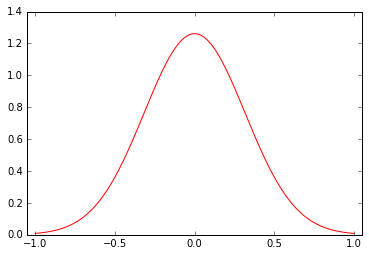

In [33]:
x = np.linspace(-1, 1, num=250)
mu = 0
var = 0.1
y = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(x-mu)**2/var)
plt.plot(x,y,'r-')
plt.axis('equal')
plt.show()

In the classical kalman filtering problem, we wish to estimate (approximate) the parameters of our distribution: $\mu$ and $\Sigma$. This is done by using the dynamics of our system to predict forward our estimate of $\mu$ and $\Sigma$ and then [updating](https://en.wikipedia.org/wiki/Bayesian_inference) that estimate based on some measurements.

So, how can we used this well established theory of estimation on $\mathbb{R}^n$ in the context of lie groups. Recall that the lie algebra $\frak{g}$ $= T_eG$ – in this case, $\frak{so}(2)$ $= T_eSO(2)$ – is naturally isomorphic to $\mathbb{R}^n$. So we will parameterize the uncertainty on the manifold/group $G$ in terms of of the lie algebra $\frak{g}$. To do this we define the [concentrated gaussian distribution (CGD)](https://hal.archives-ouvertes.fr/hal-00903252/document). Let $X$ be a random variable defined on $G$, with $x,\mu \in G$, and $\Sigma \in \mathbb{R}^{n \times n}$

$$ f_X(x\ |\ \mu, \Sigma) = \eta(x)\exp\left({-\frac{1}{2}}||\log(x\mu^{-1})^{\vee}||^2_{\Sigma}\right)$$
* exp in this expression means real-valued exponential
* $\mu$ is the group mean
* log is the group logarithm
* $\vee$ is the natural isomorphism with $\mathbb{R}^n$
* $\eta(x)$ is a normalizing factor
* $||z||^2_{\Sigma} = z^T\Sigma z$ is a weighted norm

When $|\Sigma|$ is small we can approximate $\eta(x)$ with

$$ \eta(x) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}} $$

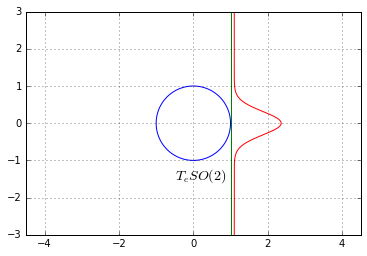

In [34]:
x = np.linspace(-3, 3, num=250)
mu = 0
var = 0.1
y = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(x-mu)**2/var)
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.text(-0.5, -1.5, '$T_eSO(2)$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.plot(y + 1.1, x)
plt.axis((-S, S, -S, S))
plt.show()

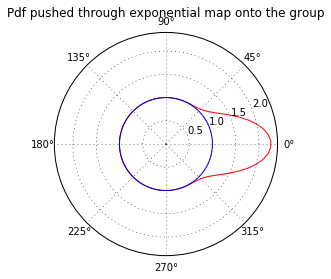

In [35]:
mu = 0
var = 0.1
theta = np.linspace(-np.pi, np.pi, 100)
circ = 100*[1]
pdf = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(theta-mu)**2/var)
plt.polar(theta, pdf + 1, '-r')
plt.polar(theta, circ)
S = 3
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.grid(True)
plt.title("Pdf pushed through exponential map onto the group")
plt.show()

Note that this $\eta(x)$ is surely not the "mathematically correct value" to normalize the distribution. This is due the fact that the $\log$ we are using is really a ["principal logarithm"](https://en.wikipedia.org/wiki/Complex_logarithm#Definition_of_principal_value). In reality, there are an infinity of vectors in the lie algebra that map to the same point on the manifold through the exponential map. To accurately represent the uncertainty in the lie algebra, we would need to sum over all the ["branches"](https://en.wikipedia.org/wiki/Complex_logarithm#Branches_of_the_complex_logarithm) like so.

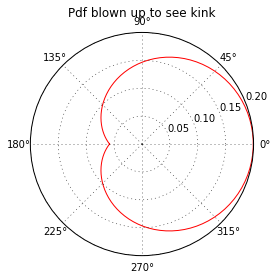

In [36]:
mu = 0
var = 4
theta = np.linspace(-np.pi, np.pi, 100)
circ = 100*[1]
pdf = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(theta-mu)**2/var)
plt.polar(theta, pdf, '-r')
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.grid(True)
plt.title("Pdf blown up to see kink")
plt.show()

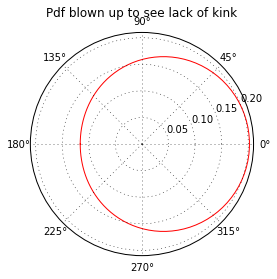

In [37]:
mu = 0
var = 4
theta_p1 = np.linspace(np.pi, 3*np.pi, 100)
theta_m1 = np.linspace(-3*np.pi, -np.pi, 100)
theta = np.linspace(-np.pi, np.pi, 100)
circ = 100*[1]
pdf = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(theta-mu)**2/var)
pdf_m1 = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(theta_m1-mu)**2/var)
pdf_p1 = 1./np.sqrt(2*np.pi*var)*np.exp(-0.5*(theta_p1-mu)**2/var)
pdf = pdf + pdf_m1 + pdf_p1
plt.polar(theta, pdf, '-r')
plt.grid(True)
plt.title("Pdf blown up to see lack of kink")
plt.show()

Thus, when $|\Sigma|$ is large there are additional problems besides just having low certainty in your estimate of $\mu$. The probability density defined on $T_eG$ must wrap around $G$, aliasing into different parts of the state estimate.

However, the variance would likely need to be __very big__ (in this case a std dev of 2 radians) for this to become an issue of importance, and you wouldn't have a good state estimate anyways. So, although it's good math, you can probably just ignore it and be safe. For non-gaussian distributions, this may play out very differently and it might be important to take into account the branches of the log function.

This also shows why we represent the mean as a group element instead of the algebra.

## Multiplicative Extended Kalman Filter
The multiplicative extended kalman filter (MEKF) was one of the first approaches to solving the dilemma of kalman filtering on manifolds. It is a indirect, or error-state kalman filter and uses a nominal-state and error-state representation to filter our estimate. A very high level algorithm could be presented as follows:

* Propagate nominal-state
* Propagate error-state and error-state covariance (EKF style)
* Perform measurement update on error-state and covariance (EKF style)
* "Add" error-state into nominal-state and reset error-state

To do this, we need to derive the error-state, its dynamics and its jacobians. We will use the same dynamics as presented before with an additional measurement model.

\begin{align}
\dot{\Phi} &= \Phi \omega^\wedge \\
\dot{\omega} &= -\frac{b}{I} \omega + \frac{1}{I} \tau \\
h(\Phi, \omega) &= \log(\Phi)^{\vee}
\end{align}

We will call these our nominal-state and nominal-state dynamics. We define our error-state and measurement follows.

\begin{align}
\delta \Phi &= \Phi\bar{\Phi}^{-1} \\
\delta \phi &= \log(\delta \Phi)^{\vee} \\
\delta \omega &= \omega - \bar{\omega} \\
h(\delta \phi, \delta \omega) &= \delta \phi
\end{align}

Where the bar respresents estimated value. Now we can take derivatives as follows
\begin{align}
\dot{\delta \phi} &= \frac{d}{dt} \log(\delta \Phi)^{\vee} \\
&= \frac{d}{dt} \log(\bar{\Phi}\Phi^{-1})^{\vee} \\
&= \frac{d}{dt} \log(\bar{\Phi})^{\vee} - \frac{d}{dt}\log(\Phi)^{\vee} \quad \text{*}\\
&= \bar{\omega} - \omega \\
&= \delta \omega \\
\dot{\delta \omega} &= -\frac{b}{I} \delta \omega
\end{align}

Note: we can only perform * because matrices on $SO(2)$ [commute](https://en.wikipedia.org/wiki/Logarithm_of_a_matrix#Properties) and because the isomorphism $\vee$ is linear by necessity. In other cases, such as $SO(3)$ more care must be taken.

Luckily, this system is completely linear, so our jacobians are given! Defining $\delta x = [\delta \phi,\ \delta \omega]^T$, we have

\begin{align}
\dot{\delta x} &=
\begin{bmatrix}
0 & 1 \\
0 & -\frac{b}{I}
\end{bmatrix} \delta x = A\delta x \\
z &= \log(\Phi\bar{\Phi}^{-1})^{\vee} = \begin{bmatrix}
1 & 0
\end{bmatrix}\delta x = C \delta x
\end{align}

We can convert this into a discrete time system using the exponential matrix.

\begin{align}
\delta x^{+} = \begin{bmatrix}
1 & \frac{I}{b}(1 - e^{-bT_s/I}) \\
0 & e^{-bT_s/I}
\end{bmatrix} \delta x
\end{align}

\begin{align}
\omega[k] &= \omega[k-1] + \left(-\frac{b}{I} \omega[k-1] + \frac{1}{I}\tau[k] \right) T_s \\
\Phi[k] &= \Phi[k-1] \exp\left(\left(\omega[k] T_s\right)^\wedge\right)
\end{align}

Lastly, let $Q$ and $R$ be process noise and measurement noise covariance matrices.

Now we can write out the MEKF in steps
#### Propogate nominal-state

\begin{align}
\omega^{+} &= \omega[k-1] + \left(-\frac{b}{I} \omega[k-1] + \frac{1}{I}\tau[k] \right) T_s \\
\Phi^{+} &= \Phi[k-1] \circ \exp\left(\left(\omega[k] T_s\right)^\wedge\right)
\end{align}

#### Propogate error-state and covariance

\begin{align}
\delta x^{+} = \begin{bmatrix}
1 & \frac{I}{b}(1 - e^{-bT_s/I}) \\
0 & e^{-bT_s/I}
\end{bmatrix} \delta x
\end{align}

\begin{align}
\Sigma^{+} = \begin{bmatrix}
1 & \frac{I}{b}(1 - e^{-bT_s/I}) \\
0 & e^{-bT_s/I}
\end{bmatrix}\Sigma[k]\begin{bmatrix}
1 & \frac{I}{b}(1 - e^{-bT_s/I}) \\
0 & e^{-bT_s/I}
\end{bmatrix}^T + Q
\end{align}

#### Perform measurement update on error-state

\begin{align}
z &= \log(\Phi\Phi^{+-1}) \\
K &= \Sigma^{+} C^T\left(C\Sigma^{+}C^T + R\right) \\
\delta x &= \delta x^{+} + K(z - \delta x) \\
\Sigma[k] &= (I - KC)\Sigma^{+}
\end{align}

#### "Add" error state into nominal state and reset error-state
\begin{align}
\omega [k] &= \omega^{+} + \delta \omega \\
\Phi [k] &= \exp(\delta x^{\wedge})\Phi^{+} \\
\delta x &\leftarrow 0
\end{align}

Note: technically, $\delta x^{+}$ will always be 0 since $\delta x = 0$, but it's good to be explicit to show we are actually propogating the state


## Open-Loop Implementation

In [38]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


class Simulator:
    def __init__(self, controller, estimator, commands=[0.0], command_duration=5.0, cl=False):
        self.controller = controller
        self.estimator = estimator
        self.cl = cl

        # time
        self.dt = 0.01
        self.t = np.arange(0.0, command_duration*len(commands), self.dt)

        # system parameters
        self.I = 1.0
        self.b = 0.1

        # system state
        self.Phi = SO2()
        self.omega = 0.0
        
        # system noise
        self.Q = np.array([[0.01, 0],[0, 0.25]])
        self.R = 0.01

        # commands
        self.theta_c = np.zeros(self.t.shape)
        for i in range(len(commands)):
            self.theta_c[i*self.t.size//len(commands):(i+1)*self.t.size//len(commands)] = commands[i]

        # history
        self.theta_hist = np.zeros(self.t.shape)
        self.omega_hist = np.zeros(self.t.shape)
        self.theta_est_hist = np.zeros(self.t.shape)
        self.omega_est_hist = np.zeros(self.t.shape)
        self.tau_hist = np.zeros(self.t.shape)

    def animate(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal', xlim=[-1.2, 1.2], ylim=[-1.2,1.2])
        ax.axis('off')
        ax.set_title(self.controller.name)

        th = np.linspace(0, 2*np.pi, 100)
        ax.plot(np.cos(th), np.sin(th), 'k-')

        self.command_line = ax.plot([], [], 'ro', label='command')[0]
        self.estimated_line = ax.plot([],[], 'go', label='estimate')[0]
        self.actual_line = ax.plot([], [], 'bo', label='actual')[0]
        ax.legend(loc='center', numpoints=1)

        return animation.FuncAnimation(fig, self.step, frames=len(self.t), interval=int(1000*self.dt), blit=False, repeat=False)

    def step(self, k):
        # if the controller uses a manifold representation, convert the command to an element of SO(2)
        if self.controller.manifold:
            if self.cl:
                tau = self.controller.run(SO2.from_angle(self.theta_c[k]), self.estimator.Phi, self.estimator.omega)
            else:    
                tau = self.controller.run(SO2.from_angle(self.theta_c[k]), self.Phi, self.omega)
        else:
            tau = self.controller.run(self.theta_c[k], self.Phi.to_angle(), self.omega)

            
        # sample noise
        xi = np.random.multivariate_normal(np.array([0.,0.]), self.Q)
        
        # propagate dynamics with noise
        self.omega += (-self.b/self.I*self.omega + 1.0/self.I*tau + xi[0])*self.dt
        self.Phi = self.Phi.dot(SO2.exp(SO2.hat((self.omega + xi[1])*self.dt)))
        # propagate estimator
        self.estimator.propagate(self.dt, tau)
        
        # draw measurement and update estimator
        self.estimator.update(self.measurement())

        # store history
        self.theta_hist[k] = self.Phi.to_angle()
        self.omega_hist[k] = self.omega
        self.tau_hist[k] = tau
        self.theta_est_hist[k] = self.estimator.Phi.to_angle()
        self.omega_est_hist[k] = self.estimator.omega

        x_c, y_c = SO2.exp(SO2.hat(self.theta_c[k])).visualize()
        x, y = self.Phi.visualize()
        x_e, y_e = self.estimator.Phi.visualize()

        self.command_line.set_data(x_c, y_c)
        self.actual_line.set_data(x, y)
        self.estimated_line.set_data(x_e, y_e)
        
    def measurement(self):
        return self.Phi.dot(SO2.exp(SO2.hat(np.random.normal(scale=np.sqrt(self.R)))))

    def plot(self):
        plt.ioff()
        fig = plt.figure()

        ax = fig.add_subplot(311)
        ax.plot(self.t, self.theta_c, 'r-', label='command')
        ax.plot(self.t, self.theta_hist, 'b-', label='actual')
        ax.plot(self.t, self.theta_est_hist, 'g-', label='estimate')
        ax.set_title(self.controller.name)
        ax.set_ylabel('theta (rad)')
        ax.legend()

        ax = fig.add_subplot(312)
        ax.plot(self.t, self.omega_hist, 'b-')
        ax.set_ylabel('omega (rad/s)')

        ax = fig.add_subplot(313)
        ax.plot(self.t, self.tau_hist, 'm-')
        ax.set_xlabel('time (s)')
        ax.set_ylabel('torque (N*m)')

        plt.show()

class MEKF(object):
    
    def __init__(self):
        self.Phi = SO2()
        self.omega = 0.0
        
        self.dx = np.matrix([[0.], [0.]])
        self.Sigma = np.eye(2)*.01
        
        # continuous time parameters
        self.Q = np.matrix([[0.01, 0.], [0., 0.25]])
        self.R = 0.01
        
        # system parameters
        self.I = 1.0
        self.b = 0.1
    
    def propagate(self, ts, tau):
        self.omega += (-self.b/self.I*self.omega + 1.0/self.I*tau)*ts
        self.Phi = self.Phi.dot(SO2.exp(SO2.hat((self.omega)*ts)))
        
        expm = np.array([[1., self.I*(1. - np.exp(-self.b*ts/self.I))/self.b],
                        [0., np.exp(-self.b*ts/self.I)]])
        
        self.dx = expm*self.dx
        self.Sigma = expm*self.Sigma*expm.T + self.Q*ts**2

    def update(self, z):
        #z = SO2.vee(SO2.log(self.Phi.dot(z.inverse())))
        z = SO2.vee(SO2.log(z.dot(self.Phi.inverse())))
        C = np.matrix([1.0, 0.])
        K = self.Sigma*C.T*la.inv(C*self.Sigma*C.T + self.R)
        self.dx = self.dx + K*(z - self.dx[0])
        
        self.omega += self.dx[1]
        self.Phi = self.Phi.dot(SO2.exp(SO2.hat(self.dx[0])))
        #self.Phi = SO2.exp(SO2.hat(self.dx[0])).dot(self.Phi)
        
        self.Sigma = (np.matrix(np.eye(2)) - K*C)*self.Sigma
        self.dx = np.matrix([[0.], [0.]])
        


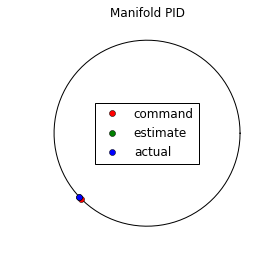

In [39]:
sim = Simulator(PID_Manifold(kp=2.0, kd=1.8), MEKF(), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())

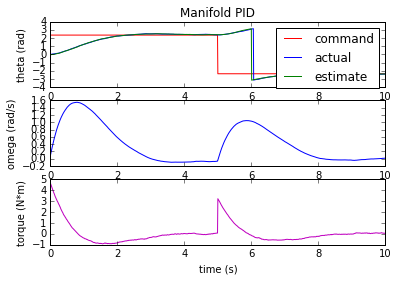

In [40]:
sim.plot()

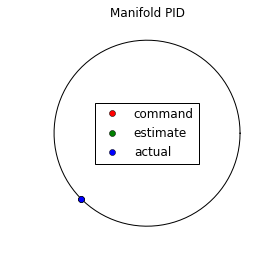

In [41]:
sim = Simulator(PID_Manifold(kp=2.0, kd=1.8), MEKF(), commands=[3*np.pi/4, -3*np.pi/4], cl=True)
HTML(sim.animate().to_html5_video())

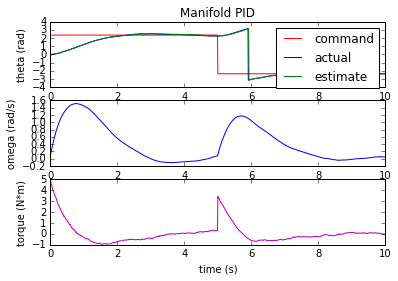

In [42]:
sim.plot()

There are also other methods of state-estimation on curvy spaces, such as the UKF method presented in [Integrating Generic Sensor Fusion Algorithms with
Sound State Representations through Encapsulation of Manifolds](https://arxiv.org/pdf/1107.1119.pdf) ($\boxplus, \boxminus$ paper).